In [6]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Airline Data

In [7]:
df_read = pd.read_csv('data/ONTIME_2017.08.csv')
df_read.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Unnamed: 42'],
      dtype='object')

In [8]:
df_read.DEST.head()

0    SEA
1    BOS
2    SEA
3    BOS
4    ANC
Name: DEST, dtype: object

In [9]:
# Each file on flight data represents one month of data
FlightDataDates = ['2017.08',
                   '2017.09',
                   '2017.10',
                   '2017.11',
                   '2017.12',
                   '2018.01',
                   '2018.02',
                   '2018.03',
                   '2018.04',
                   '2018.05',
                   '2018.06',
                   '2018.07']

#FlightDataDates = ['2017.08',
#                   '2017.09']

In [10]:
# Read the data file and strip out the unused columns
# DataDate - string in the form '2018.04'
# Return a cleaned DataFrame

def ReadFlightData(DataDate):
    df_read = pd.read_csv('data/ONTIME_'+DataDate+'.csv')
    df = df_read[['FL_DATE','OP_UNIQUE_CARRIER','OP_CARRIER_FL_NUM','ORIGIN',
                  'DEST','CRS_ARR_TIME','ARR_TIME','DISTANCE','CANCELLED',
                  'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY', 'SECURITY_DELAY',
                  'LATE_AIRCRAFT_DELAY']]
    return df

In [11]:
df = pd.DataFrame()
for DataDate in FlightDataDates:
    print(DataDate)
    df = df.append(ReadFlightData(DataDate))
              

2017.08
2017.09
2017.10
2017.11
2017.12
2018.01
2018.02
2018.03
2018.04
2018.05
2018.06
2018.07


In [12]:
#df = ReadFlightData('2017.09')
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_ARR_TIME,ARR_TIME,DISTANCE,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-08-12,B6,497,BOS,SEA,2308,2302.0,2496,0,NaN,NaN,NaN,NaN,NaN
1,2017-08-12,B6,498,SEA,BOS,818,813.0,2496,0,NaN,NaN,NaN,NaN,NaN
2,2017-08-12,B6,597,BOS,SEA,1018,951.0,2496,0,NaN,NaN,NaN,NaN,NaN
3,2017-08-12,B6,598,SEA,BOS,1934,1925.0,2496,0,NaN,NaN,NaN,NaN,NaN
4,2017-08-12,B6,907,SEA,ANC,2318,2257.0,1448,0,NaN,NaN,NaN,NaN,NaN


In [13]:
df.ORIGIN.value_counts()

SEA    140319
GEG     12484
SFO     10235
LAX      9477
DEN      9044
LAS      7594
ANC      6780
SLC      6181
PHX      6072
ORD      5976
SMF      4697
PDX      4638
DFW      4451
OAK      4424
MSP      4374
SJC      4121
BOI      4013
SAN      3794
PSC      3684
ATL      3095
JFK      2802
SNA      2648
IAH      2493
DTW      2414
BOS      2263
EWR      2200
FAI      1886
BLI      1854
HNL      1726
OGG      1448
        ...  
MIA       465
IND       408
TUS       386
RNO       385
MSY       375
OMA       365
TPA       365
SAT       365
SBA       339
BZN       311
RDM       304
EUG       303
SIT       302
ABQ       297
MFR       235
CHS       228
ICT       192
CVG       170
AZA       169
SBP       113
CLE       102
BIL        96
MSO        91
HOU        69
OKC        66
COS        50
JAC        39
SUN         4
MHK         1
MSN         1
Name: ORIGIN, Length: 84, dtype: int64

In [14]:
df.shape

(306810, 14)

In [15]:
# Unique Airlines
sorted(df['OP_UNIQUE_CARRIER'].unique())

['AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'NK', 'OO', 'UA', 'VX', 'WN']

FL_DATE
2017-08-01    962
2017-08-02    967
2017-08-03    967
2017-08-04    970
2017-08-05    912
dtype: int64
365


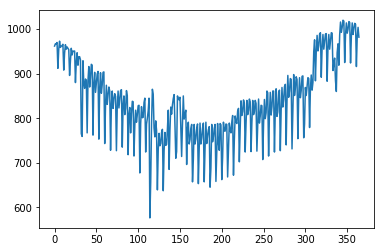

In [16]:
df2 = df.groupby(['FL_DATE']).size()
print(df2.head())
print(df2.size)
plt.plot(range(365),df2);

### Add OnTime column
By definition, if the flight ARR_TIME is 15 minutes more than CRS_ARR_TIME (CRS = Computerized Reservations Systems) then the flight is late

In [17]:
df['Delay'] = (df['ARR_TIME'] - df['CRS_ARR_TIME'] >= 15).apply(lambda x: 1 if x == True else 0)

df.head()

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_ARR_TIME,ARR_TIME,DISTANCE,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Delay
0,2017-08-12,B6,497,BOS,SEA,2308,2302.0,2496,0,NaN,NaN,NaN,NaN,NaN,0
1,2017-08-12,B6,498,SEA,BOS,818,813.0,2496,0,NaN,NaN,NaN,NaN,NaN,0
2,2017-08-12,B6,597,BOS,SEA,1018,951.0,2496,0,NaN,NaN,NaN,NaN,NaN,0
3,2017-08-12,B6,598,SEA,BOS,1934,1925.0,2496,0,NaN,NaN,NaN,NaN,NaN,0
4,2017-08-12,B6,907,SEA,ANC,2318,2257.0,1448,0,NaN,NaN,NaN,NaN,NaN,0


In [20]:
df.to_csv('data/FlightData.csv')

## Weather Data

In [ ]:
WeatherData = pd.read_csv('data/WeatherDayAverage.csv')

In [ ]:
WeatherData.columns

In [ ]:
WeatherData.head()